# Education Statistics Dataset
by Pittawat Taveekitworachai 61130500220

Data Source: [World Bank](https://datacatalog.worldbank.org/dataset/education-statistics)

# Setup

## Import required dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

## General config

In [ ]:
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
prefix_path = '/gdrive/MyDrive/Colab Notebooks/CSC536/'

## Import dataset and Data Examination

In [ ]:
country = pd.read_csv(f'{prefix_path}country.csv')
education = pd.read_csv(f'{prefix_path}education.csv')

In [ ]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
education.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [ ]:
education.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [ ]:
country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [ ]:
education.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

# Data Preparation

In [ ]:
country['Unnamed: 31'].unique()

array([nan])

In [ ]:
education['Unnamed: 69'].unique()

array([nan])

In [ ]:
country.drop('Unnamed: 31', axis='columns', inplace=True)
education.drop('Unnamed: 69', axis='columns', inplace=True)

In [ ]:
education = education.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
        var_name='Year', 
        value_name='Value')

In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650450 entries, 0 to 57650449
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   Year            object 
 5   Value           float64
dtypes: float64(1), object(5)
memory usage: 2.6+ GB


In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650450 entries, 0 to 57650449
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   Year            object 
 5   Value           float64
dtypes: float64(1), object(5)
memory usage: 2.6+ GB


In [ ]:
education['Year'] = pd.to_datetime(education['Year'], format='%Y')

In [ ]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650450 entries, 0 to 57650449
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Country Name    object        
 1   Country Code    object        
 2   Indicator Name  object        
 3   Indicator Code  object        
 4   Year            datetime64[ns]
 5   Value           float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.6+ GB


In [ ]:
education.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970-01-01,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970-01-01,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970-01-01,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970-01-01,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970-01-01,54.822121


In [ ]:
education = education.dropna()

In [ ]:
education['Indicator Name'].unique()

array(['Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       ...,
       'SABER: (Tertiary Education) Policy Goal 6 Lever 2: Fostering RDI and Innovation',
       'SABER: (Tertiary Education) Policy Goal 6 Lever 3: Fostering Social and Cultural Development and Environmental Protection and Sustainability',
       'SABER: (Tertiary Education) Policy Goal 6: The Relevance of Tertiary Education for Economic and Social Needs'],
      dtype=object)

# Data Visualization

## GDP per capita, PPP (current international $) Thailand vs World

In [ ]:
gdp = education[(education['Indicator Name'] == 'GDP per capita, PPP (current international $)') & (education['Year'] >= '2000-01-01') & (education['Year'] <= '2015-12-31')]

In [ ]:
gdp_th_world = gdp[(gdp['Country Name'] == 'Thailand') | (gdp['Country Name'] == 'World')]
gdp_th_world.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
26697107,World,WLD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2000-01-01,7926.047904
27404452,Thailand,THA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2000-01-01,7283.511290
27584037,World,WLD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2001-01-01,8208.189373
28291382,Thailand,THA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2001-01-01,7635.093003
28470967,World,WLD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2002-01-01,8484.916473


Text(0, 0.5, 'GDP per capita, PPP (current international $)')

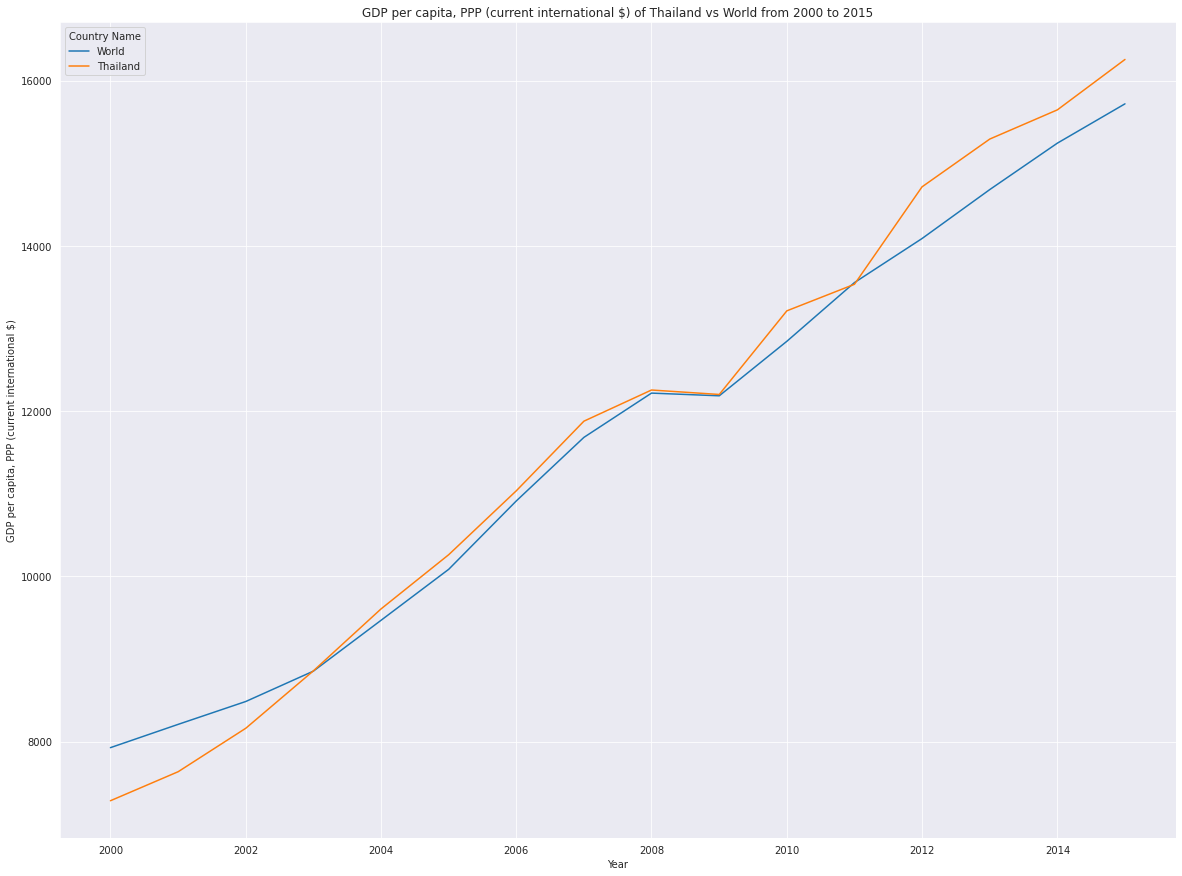

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.lineplot(data=gdp_th_world, x="Year", y="Value", hue='Country Name')

ax.set_title("GDP per capita, PPP (current international $) of Thailand vs World from 2000 to 2015")
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita, PPP (current international $)')

In this time-series plot, it shows that gross domestic product scaled with purchasing power parity and current international dollars. It means the GDP is scaled to the current value of dollars unit and apply the scaling on the price of common goods to have the same scale for comparison. It can be seen that comparing Thailand to the average of the world, Thailand is doing quite good. Because the GDP (PPP) of Thailand over time is around the average from 2000 to 2015. GDP is one of a very good indicator on how each country doing in term of economic. As generally know that economic status can affect other aspects of the country, for example, education, politics, health services.

Text(0.5, 0, 'GDP per capita, PPP (current international $)')

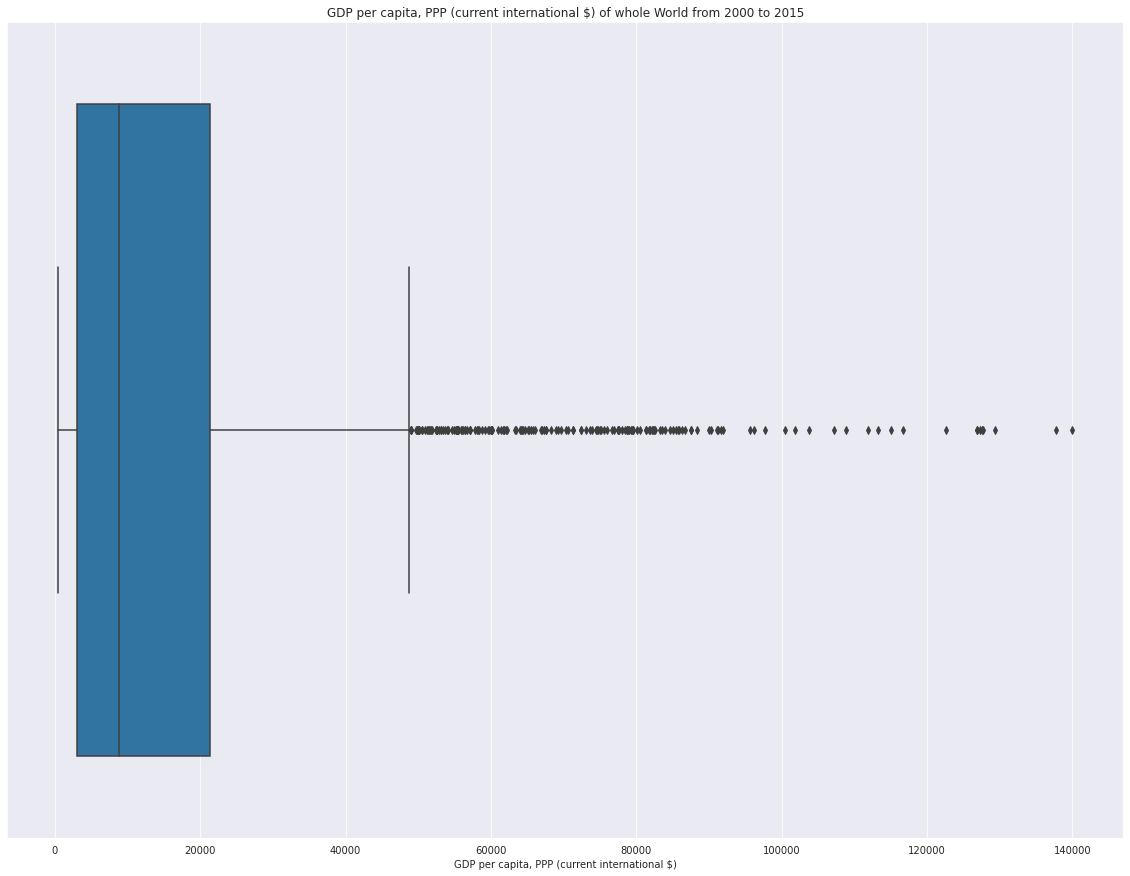

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.boxplot(x="Value", data=gdp)

ax.set_title("GDP per capita, PPP (current international $) of whole World from 2000 to 2015")
ax.set_xlabel('GDP per capita, PPP (current international $)')

Observing the boxplot and it can be seen that most country fall below the average, so Thailand doing around average is quite good to be said. But the maximum and minimum also very wide. So, some countries has very high and extremely low GDP.

## PISA Thailand vs World

In [ ]:
pisa_math = education[education['Indicator Name'] == 'PISA: Mean performance on the mathematics scale']
pisa_read = education[education['Indicator Name'] == 'PISA: Mean performance on the reading scale']
pisa_sci = education[education['Indicator Name'] == 'PISA: Mean performance on the science scale']

In [ ]:
pisa_math_th = pisa_math[pisa_math['Country Name'] == 'Thailand']
pisa_read_th = pisa_read[pisa_read['Country Name'] == 'Thailand']
pisa_sci_th = pisa_sci[pisa_sci['Country Name'] == 'Thailand']

In [ ]:
pisa_math_mean_world = pisa_math.groupby('Year', as_index=False).mean()
pisa_math_mean_world['Country Name'] = 'World'
pisa_math_mean_world['Country Code'] = 'WRD'
pisa_math_mean_world['Indicator Name'] = 'PISA: Mean performance on the mathematics scale'
pisa_math_mean_world['Indicator Code'] = 'LO.PISA.MAT'
pisa_math_mean_world.head()

,Year,Value,Country Name,Country Code,Indicator Name,Indicator Code
0,2000-01-01,470.226190,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT
1,2003-01-01,485.760587,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT
2,2006-01-01,467.643993,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT
3,2009-01-01,461.926995,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT
4,2012-01-01,473.109462,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT


In [ ]:
pisa_read_mean_world = pisa_read.groupby('Year', as_index=False).mean()
pisa_read_mean_world['Country Name'] = 'World'
pisa_read_mean_world['Country Code'] = 'WRD'
pisa_read_mean_world['Indicator Name'] = 'PISA: Mean performance on the reading scale'
pisa_read_mean_world['Indicator Code'] = 'LO.PISA.REA'
pisa_read_mean_world.head()

,Year,Value,Country Name,Country Code,Indicator Name,Indicator Code
0,2000-01-01,471.349832,World,WRD,PISA: Mean performance on the reading scale,LO.PISA.REA
1,2003-01-01,480.876088,World,WRD,PISA: Mean performance on the reading scale,LO.PISA.REA
2,2006-01-01,458.893651,World,WRD,PISA: Mean performance on the reading scale,LO.PISA.REA
3,2009-01-01,458.963963,World,WRD,PISA: Mean performance on the reading scale,LO.PISA.REA
4,2012-01-01,473.204464,World,WRD,PISA: Mean performance on the reading scale,LO.PISA.REA


In [ ]:
pisa_sci_mean_world = pisa_sci.groupby('Year', as_index=False).mean()
pisa_sci_mean_world['Country Name'] = 'World'
pisa_sci_mean_world['Country Code'] = 'WRD'
pisa_sci_mean_world['Indicator Name'] = 'PISA: Mean performance on the science scale'
pisa_sci_mean_world['Indicator Code'] = 'LO.PISA.SCI'
pisa_sci_mean_world.head()

,Year,Value,Country Name,Country Code,Indicator Name,Indicator Code
0,2000-01-01,473.170070,World,WRD,PISA: Mean performance on the science scale,LO.PISA.SCI
1,2003-01-01,488.519952,World,WRD,PISA: Mean performance on the science scale,LO.PISA.SCI
2,2006-01-01,472.159265,World,WRD,PISA: Mean performance on the science scale,LO.PISA.SCI
3,2009-01-01,466.125810,World,WRD,PISA: Mean performance on the science scale,LO.PISA.SCI
4,2012-01-01,477.916935,World,WRD,PISA: Mean performance on the science scale,LO.PISA.SCI


In [ ]:
pisa_th_world = pd.concat([pisa_math_th, pisa_math_mean_world, pisa_read_th, pisa_read_mean_world, pisa_sci_th, pisa_sci_mean_world])
pisa_th_world

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
27405503,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2000-01-01,432.000000
30066293,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2003-01-01,416.977960
32727083,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2006-01-01,417.072614
35387873,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2009-01-01,418.583935
38048663,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2012-01-01,426.737491
40709453,Thailand,THA,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2015-01-01,415.463800
0,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2000-01-01,470.226190
1,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2003-01-01,485.760587
2,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2006-01-01,467.643993
3,World,WRD,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,2009-01-01,461.926995


Text(0, 0.5, 'PISA Score')

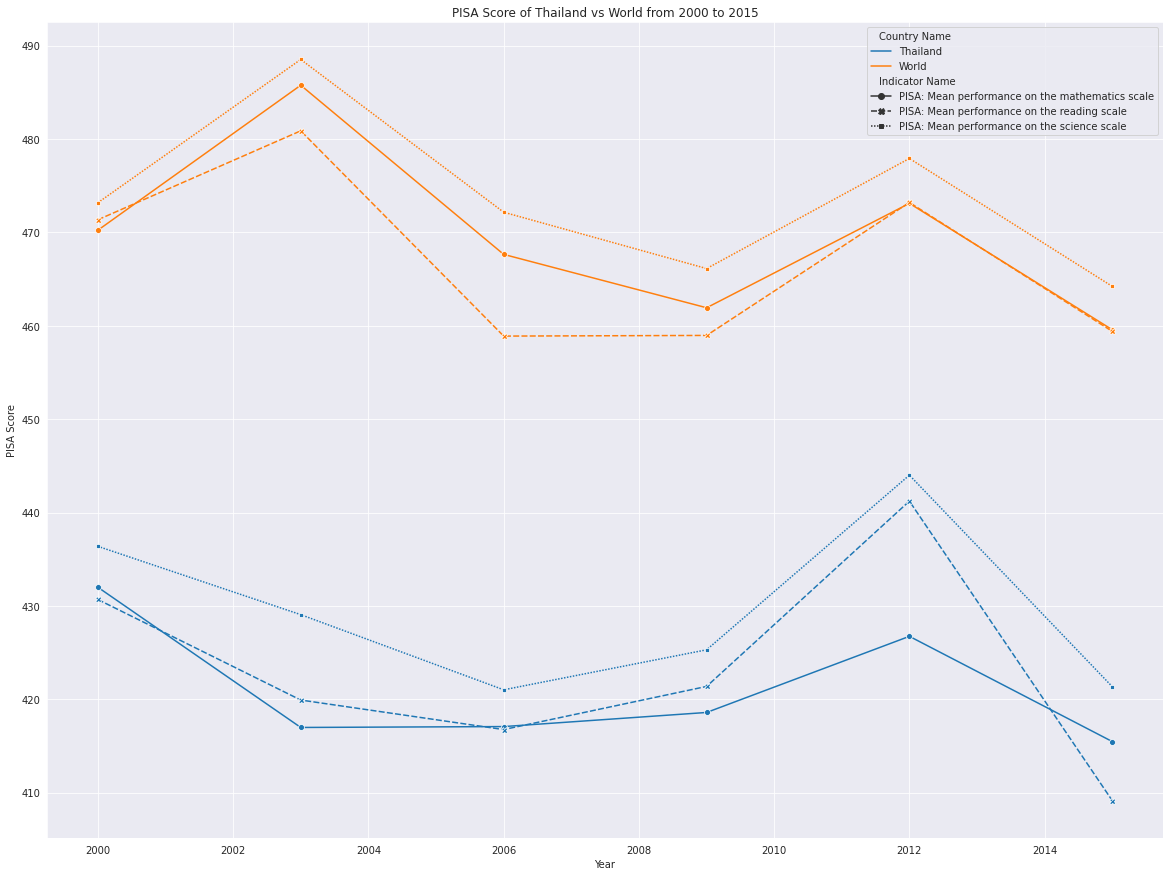

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.lineplot(data=pisa_th_world, x="Year", y="Value", hue='Country Name', style='Indicator Name', markers=True)

ax.set_title("PISA Score of Thailand vs World from 2000 to 2015")
ax.set_xlabel('Year')
ax.set_ylabel('PISA Score')

The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development (OECD) in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading. PISA is held every three years. This graph stated all three types of PISA test's scores, mathematics, reading, and science. This chart comapres the score between Thailand and the average score on the world. The PISA score scaled to fit normal distribution, so maximum and minimum score does not really matter much. In this comparison, Thailand performs poorly compare to the world average. Despite the fact that Thailand performs quite well on the GDP that comparable to the average.

## Average Years of Primary Schooling of Thailand vs World

In [ ]:
primary_schooling = education[education['Indicator Name'] == 'Barro-Lee: Average years of primary schooling, age 15+, total']

In [ ]:
primary_schooling_world = primary_schooling.groupby('Year', as_index=False).mean()
primary_schooling_world['Country Name'] = 'World'
primary_schooling_world['Country Code'] = 'WTD'
primary_schooling_world['Indicator Name'] = 'Barro-Lee: Average years of primary schooling, age 15+, total'
primary_schooling_world['Indicator Code'] = 'BAR.PRM.SCHL.15UP'
primary_schooling_world.head()

,Year,Value,Country Name,Country Code,Indicator Name,Indicator Code
0,1970-01-01,3.101944,World,WTD,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP
1,1975-01-01,3.357847,World,WTD,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP
2,1980-01-01,3.633611,World,WTD,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP
3,1985-01-01,3.890208,World,WTD,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP
4,1990-01-01,4.102153,World,WTD,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP


In [ ]:
primary_schooling_th = primary_schooling[primary_schooling['Country Name'] == 'Thailand']
primary_schooling_th.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
795455,Thailand,THA,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1970-01-01,2.15
5230105,Thailand,THA,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1975-01-01,2.46
9664755,Thailand,THA,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1980-01-01,2.87
14099405,Thailand,THA,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1985-01-01,3.24
18534055,Thailand,THA,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1990-01-01,3.75


In [ ]:
primary_schooling_th_world = pd.concat([primary_schooling_th, primary_schooling_world])

Text(0, 0.5, 'Average Years of Schooling (15+ years population)')

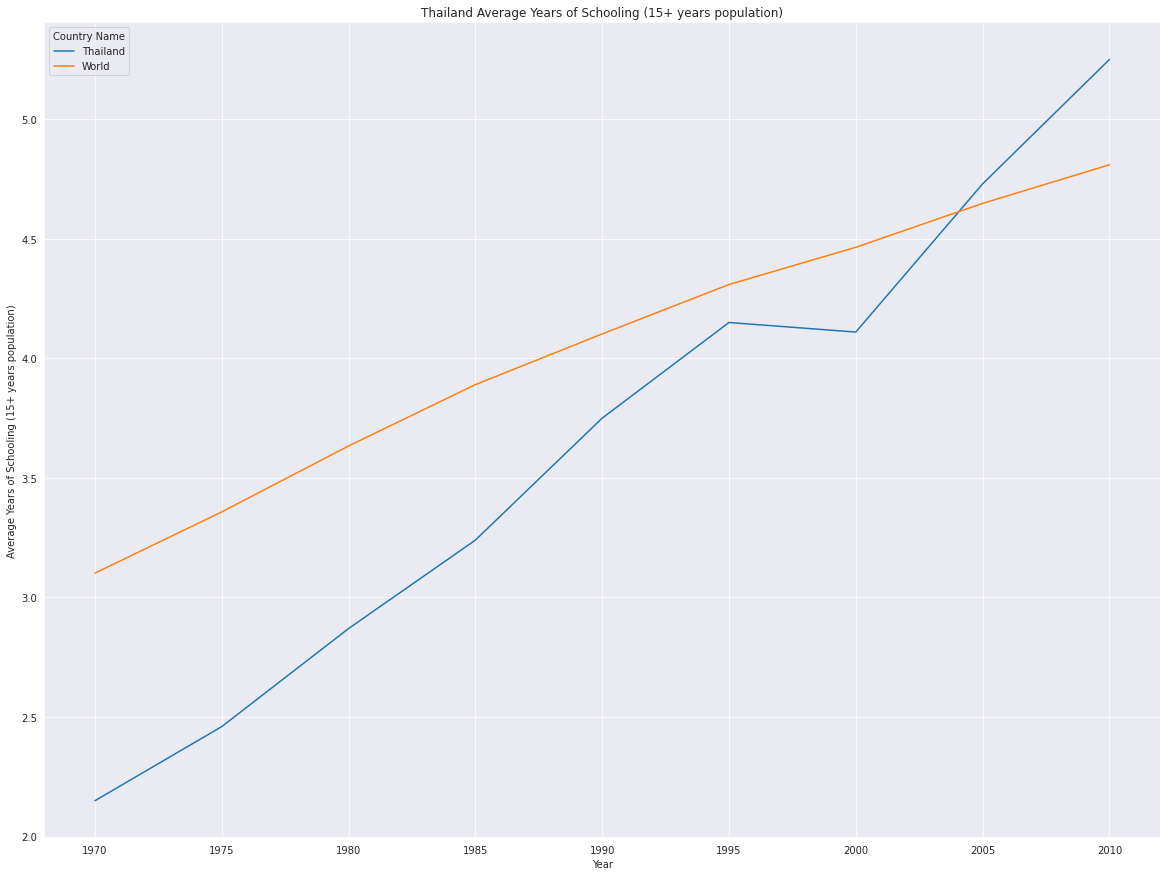

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.lineplot(data=primary_schooling_th_world, x="Year", y="Value", hue='Country Name')

ax.set_title("Thailand Average Years of Schooling (15+ years population)")
ax.set_xlabel('Year')
ax.set_ylabel('Average Years of Schooling (15+ years population)')

This chart shows the average years of schooling of population with age over 15 in Thailand compare to the world average. It can be clearly seen that Thailand's primary schooling years is longer than the average of the world. So, we can roughly say that with longer priamry education time, population maybe better at basic skills such as mathematics and reading. But the trend of Thailand years is not that steep compare to the world average. So, the world puts more effort to accelerate the rate of change in primary schooling years.

In [ ]:
primary_schooling_2010 = primary_schooling[primary_schooling['Year'] == '2010-01-01']

Text(0, 0.5, 'Count')

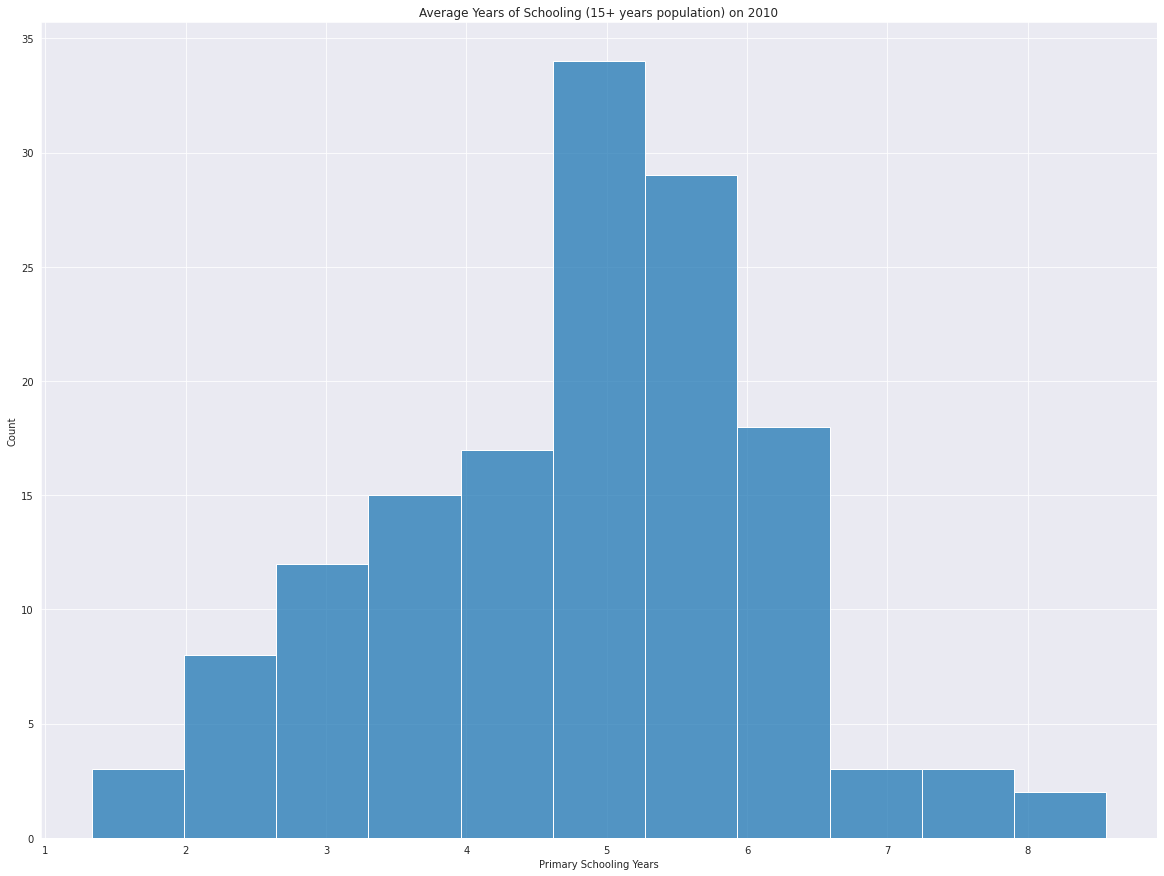

In [ ]:
plt.figure(figsize=(20,15))

ax = sns.histplot(primary_schooling_2010, x="Value")

ax.set_title("Average Years of Schooling (15+ years population) on 2010")
ax.set_xlabel('Primary Schooling Years')
ax.set_ylabel('Count')

This histogram shows that most of the countries population has around 5 to 6 years (Thailand has around this number). This may not be surprising, since primary education usually take around 6 years for most of the countries. However, compare the left side and right side of the mean. It can be seen that most of the countries have less than 5 years of primary schooling.

## TIMSS of Thailand vs World

In [ ]:
timss_math_four = education[education['Indicator Name'] == 'TIMSS: Mean performance on the mathematics scale for fourth grade students, total']
timss_math_eight = education[education['Indicator Name'] == 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total']
timss_sci_four = education[education['Indicator Name'] == 'TIMSS: Mean performance on the science scale for fourth grade students, total']
timss_sci_eight = education[education['Indicator Name'] == 'TIMSS: Mean performance on the science scale for eighth grade students, total']

In [ ]:
timss_math_four_th = timss_math_four[timss_math_four['Country Name'] == 'Thailand']
timss_math_eight_th = timss_math_eight[timss_math_eight['Country Name'] == 'Thailand']
timss_sci_four_th = timss_sci_four[timss_sci_four['Country Name'] == 'Thailand']
timss_sci_eight_th = timss_sci_eight[timss_sci_eight['Country Name'] == 'Thailand']

In [ ]:
timss_math_four_world = timss_math_four.groupby('Year', as_index=False).mean()
timss_math_four_world['Country Name'] = 'World'
timss_math_four_world['Country Code'] = 'WRD'
timss_math_four_world['Indicator Name'] = 'TIMSS: Mean performance on the mathematics scale for fourth grade students, total'
timss_math_four_world['Indicator Code'] = 'LO.TIMSS.MAT4'

In [ ]:
timss_math_eight_world = timss_math_eight.groupby('Year', as_index=False).mean()
timss_math_eight_world['Country Name'] = 'World'
timss_math_eight_world['Country Code'] = 'WRD'
timss_math_eight_world['Indicator Name'] = 'TIMSS: Mean performance on the mathematics scale for eighth grade students, total'
timss_math_eight_world['Indicator Code'] = 'LO.TIMSS.MAT8'

In [ ]:
timss_sci_four_world = timss_sci_four.groupby('Year', as_index=False).mean()
timss_sci_four_world['Country Name'] = 'World'
timss_sci_four_world['Country Code'] = 'WRD'
timss_sci_four_world['Indicator Name'] = 'TIMSS: Mean performance on the science scale for fourth grade students, total'
timss_sci_four_world['Indicator Code'] = 'LO.TIMSS.SCI4'

In [ ]:
timss_sci_eight_world = timss_sci_eight.groupby('Year', as_index=False).mean()
timss_sci_eight_world['Country Name'] = 'World'
timss_sci_eight_world['Country Code'] = 'WRD'
timss_sci_eight_world['Indicator Name'] = 'TIMSS: Mean performance on the science scale for eighth grade students, total'
timss_sci_eight_world['Indicator Code'] = 'LO.TIMSS.SCI8'

In [ ]:
timss = pd.concat([timss_math_four_th, timss_math_eight_th, timss_sci_four_th, timss_sci_eight_th, timss_math_four_world, timss_math_eight_world, timss_sci_four_world, timss_sci_eight_world])
timss.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
22971636,Thailand,THA,TIMSS: Mean performance on the mathematics sca...,LO.TIMSS.MAT4,1995-01-01,466.523453
37162516,Thailand,THA,TIMSS: Mean performance on the mathematics sca...,LO.TIMSS.MAT4,2011-01-01,457.975859
22971633,Thailand,THA,TIMSS: Mean performance on the mathematics sca...,LO.TIMSS.MAT8,1995-01-01,516.215545
26519353,Thailand,THA,TIMSS: Mean performance on the mathematics sca...,LO.TIMSS.MAT8,1999-01-01,467.000000
33614793,Thailand,THA,TIMSS: Mean performance on the mathematics sca...,LO.TIMSS.MAT8,2007-01-01,441.000000


In [ ]:
timss_four_math = pd.concat([timss_math_four_th, timss_math_four_world])
timss_eight_math = pd.concat([timss_math_eight_th, timss_math_eight_world])
timss_four_sci = pd.concat([timss_sci_four_th, timss_sci_four_world])
timss_eight_sci = pd.concat([timss_sci_eight_th, timss_sci_eight_world])

(420.0, 530.0)

<Figure size 1440x1080 with 0 Axes>

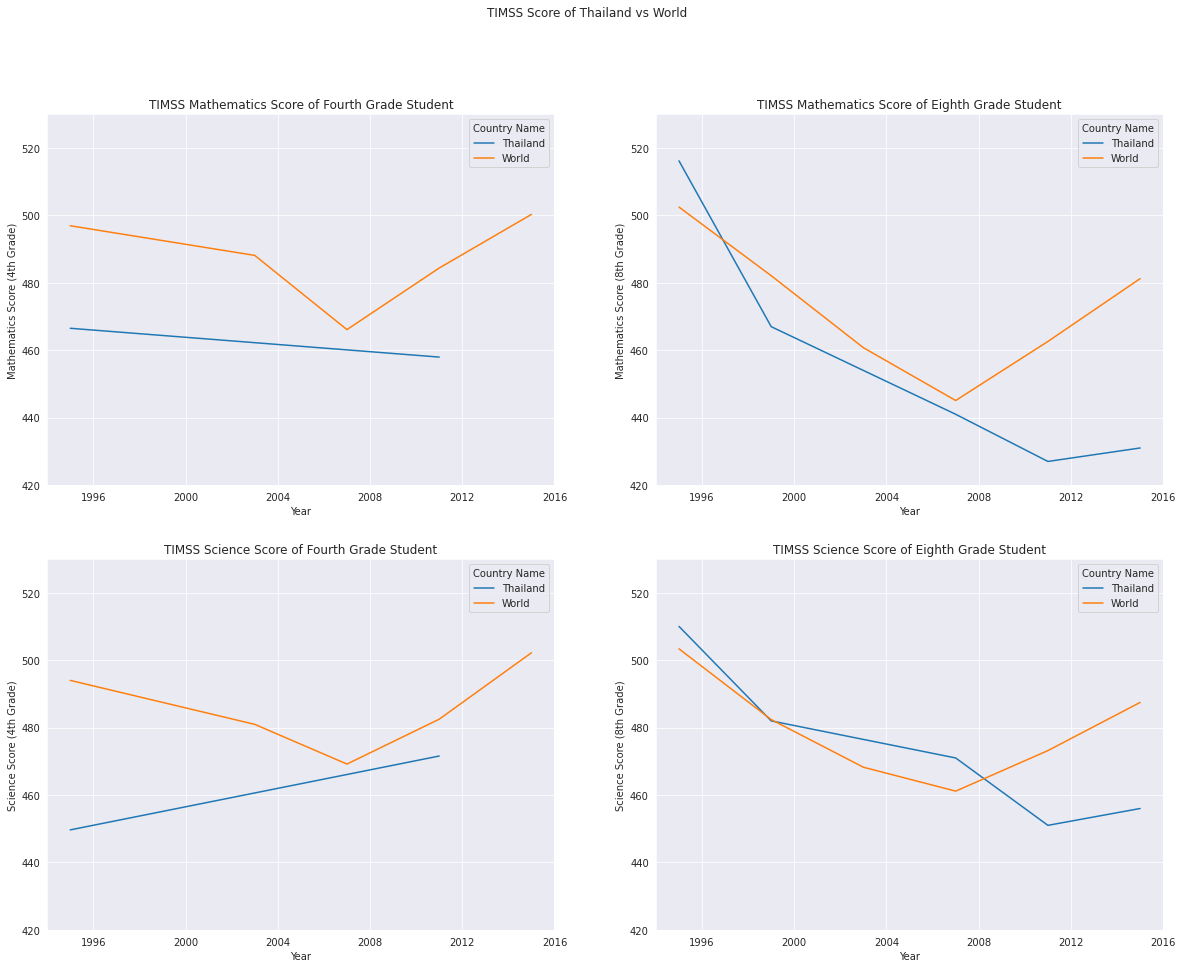

In [ ]:
plt.figure(figsize=(20,15))

# ax.set_title("TIMSS of Thailand vs World")
# ax.set_xlabel('Year')
# ax.set_ylabel('TIMSS')

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('TIMSS Score of Thailand vs World')

sns.lineplot(ax=axs[0, 0], data=timss_four_math, x="Year", y="Value", hue='Country Name')
axs[0, 0].set_title("TIMSS Mathematics Score of Fourth Grade Student")
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Mathematics Score (4th Grade)')
axs[0, 0].set_ylim(420, 530)

sns.lineplot(ax=axs[0, 1], data=timss_eight_math, x="Year", y="Value", hue='Country Name')
axs[0, 1].set_title("TIMSS Mathematics Score of Eighth Grade Student")
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Mathematics Score (8th Grade)')
axs[0, 1].set_ylim(420, 530)

sns.lineplot(ax=axs[1, 0], data=timss_four_sci, x="Year", y="Value", hue='Country Name')
axs[1, 0].set_title("TIMSS Science Score of Fourth Grade Student")
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Science Score (4th Grade)')
axs[1, 0].set_ylim(420, 530)

sns.lineplot(ax=axs[1, 1], data=timss_eight_sci, x="Year", y="Value", hue='Country Name')
axs[1, 1].set_title("TIMSS Science Score of Eighth Grade Student")
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Science Score (8th Grade)')
axs[1, 1].set_ylim(420, 530)

Trends in International Mathematics and Science Study (TIMSS) is an international assessment focused on mathematics and science. Participants in tests are fourth and eighth grade students (or equivalent). In this visuals, it focuses on Thailand performance compare to the world average. From the graphs, we can see that Thailand performance is acceptable on all subjects in almost every years. While eighth students performing around the average, the score performed by fourth grade student is a little bit lower than the world average. So, this confirms that average performance of students in Thailand on mathematics is on avereage. And, Thai student are better at mathematics because study heavier and deeper is a myth. It is a truth that Thai students can achieved many academic internations awards. But look at the whole picture of every students in Thailand, that does not seem to be the case. Another interesting trend is that Thai mathematics and science scores except the science score by fourth grade students has decreasing trend, while the world seems to be an increasing trend after 2007. This could show a sign of a problem that we are moving backwards in term of academic perforamnce at global scale.

In [ ]:
timss_math_four_2015 = timss_math_four[timss_math_four['Year'] == '2015-01-01']
timss_math_eight_2015 = timss_math_eight[timss_math_eight['Year'] == '2015-01-01']
timss_sci_four_2015 = timss_sci_four[timss_sci_four['Year'] == '2015-01-01']
timss_sci_eight_2015 = timss_sci_eight[timss_sci_eight['Year'] == '2015-01-01']

(300.0, 630.0)

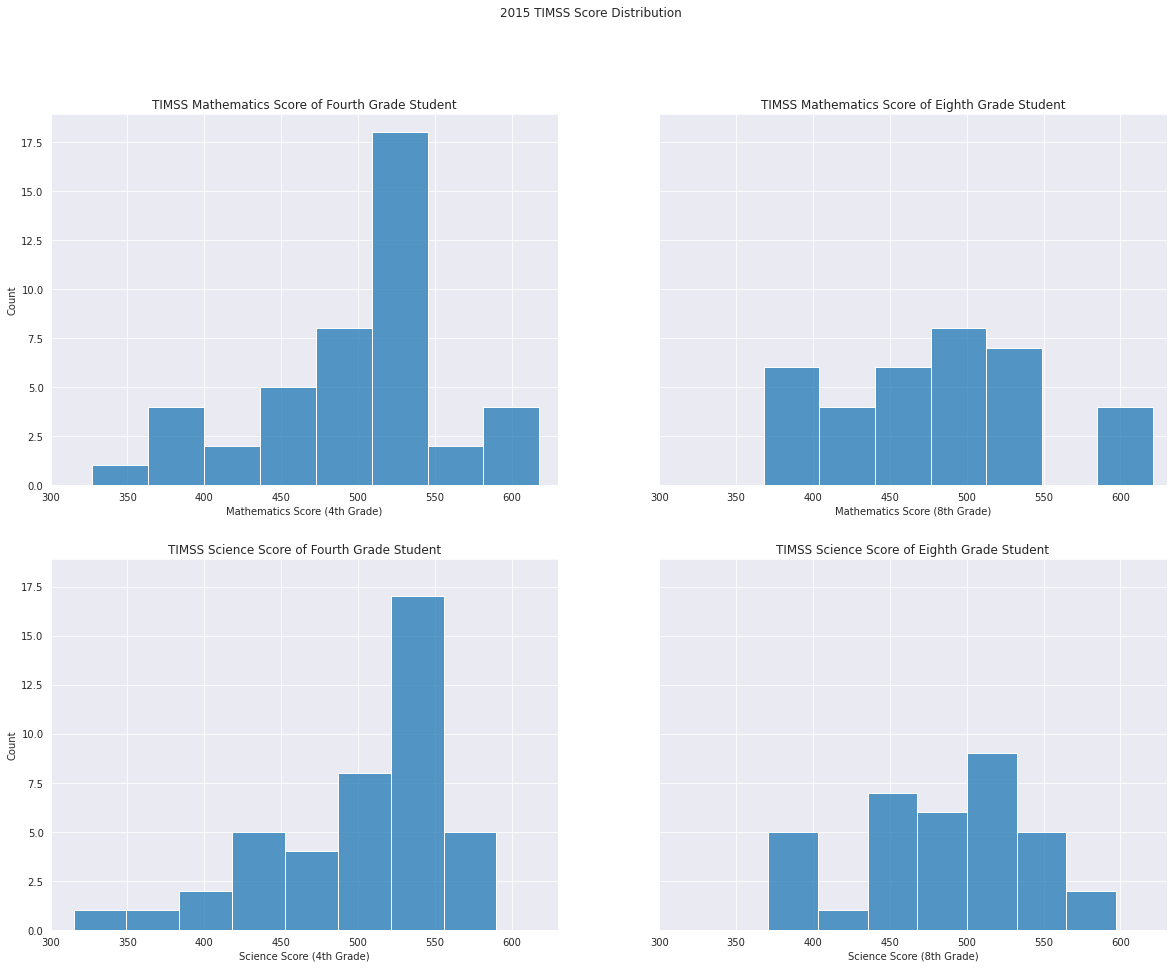

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharey=True)
fig.suptitle('2015 TIMSS Score Distribution')

sns.histplot(ax=axs[0, 0], data=timss_math_four_2015, x="Value")
axs[0, 0].set_title("TIMSS Mathematics Score of Fourth Grade Student")
axs[0, 0].set_xlabel('Mathematics Score (4th Grade)')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlim(300, 630)

sns.histplot(ax=axs[0, 1], data=timss_math_eight_2015, x="Value")
axs[0, 1].set_title("TIMSS Mathematics Score of Eighth Grade Student")
axs[0, 1].set_xlabel('Mathematics Score (8th Grade)')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlim(300, 630)

sns.histplot(ax=axs[1, 0], data=timss_sci_four_2015, x="Value")
axs[1, 0].set_title("TIMSS Science Score of Fourth Grade Student")
axs[1, 0].set_xlabel('Science Score (4th Grade)')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlim(300, 630)

sns.histplot(ax=axs[1, 1], data=timss_sci_eight_2015, x="Value")
axs[1, 1].set_title("TIMSS Science Score of Eighth Grade Student")
axs[1, 1].set_xlabel('Science Score (8th Grade)')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlim(300, 630)

In this chart, it shows the distribution of 2015 TIMSS scores. While the score performing by the eighth students show that mostly flat distributed. The score performed by fourth grade student crowded around 500 - 550. 

Text(0, 0.5, '')

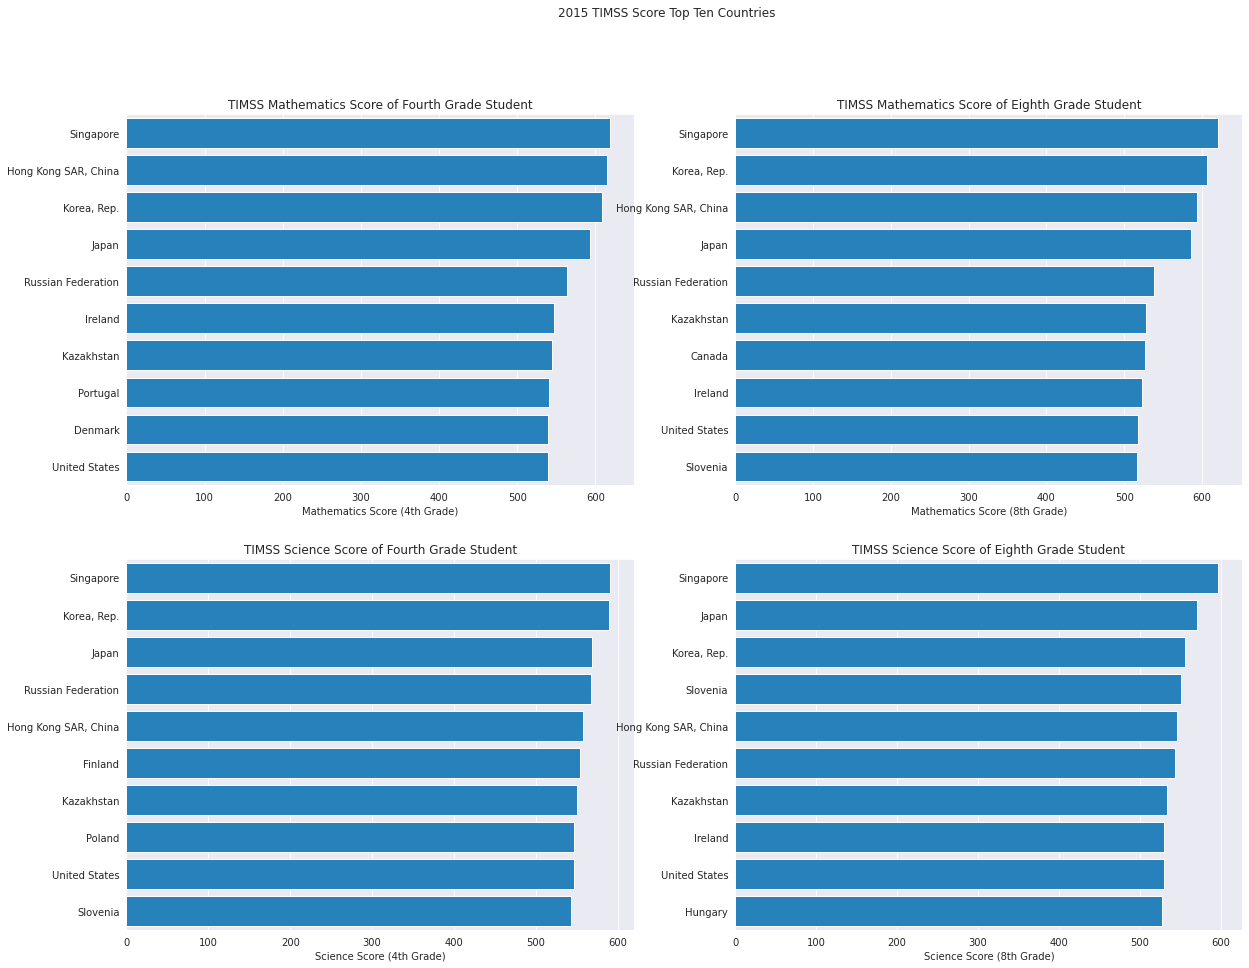

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('2015 TIMSS Score Top Ten Countries')

sns.barplot(ax=axs[0, 0], data=timss_math_four_2015.nlargest(10, 'Value'), x="Value", y='Country Name', color="#0E86D4")
axs[0, 0].set_title("TIMSS Mathematics Score of Fourth Grade Student")
axs[0, 0].set_xlabel('Mathematics Score (4th Grade)')
axs[0, 0].set_ylabel('')

sns.barplot(ax=axs[0, 1], data=timss_math_eight_2015.nlargest(10, 'Value'), x="Value", y='Country Name', color="#0E86D4")
axs[0, 1].set_title("TIMSS Mathematics Score of Eighth Grade Student")
axs[0, 1].set_xlabel('Mathematics Score (8th Grade)')
axs[0, 1].set_ylabel('')

sns.barplot(ax=axs[1, 0], data=timss_sci_four_2015.nlargest(10, 'Value'), x="Value", y='Country Name', color="#0E86D4")
axs[1, 0].set_title("TIMSS Science Score of Fourth Grade Student")
axs[1, 0].set_xlabel('Science Score (4th Grade)')
axs[1, 0].set_ylabel('')

sns.barplot(ax=axs[1, 1], data=timss_sci_eight_2015.nlargest(10, 'Value'), x="Value", y='Country Name', color="#0E86D4")
axs[1, 1].set_title("TIMSS Science Score of Eighth Grade Student")
axs[1, 1].set_xlabel('Science Score (8th Grade)')
axs[1, 1].set_ylabel('')

The charts show the top ten countries with highest 2015 score in each category. The highest scores in all categories achieved by Singapore. So, it can said that Singapore students is very strong in mathematics and science skills. Korea Republic, Hong Kong, and Japan seems to be very competitive in term of the score as well. The top three in each categories do not have a large gap in the score, but rather very close cut. Surprisingly, Kazakhastan which has an image of third world country also performing very well and can be included in a top ten in very categories.

# Data Wrangling for R/Orange



In [ ]:
education[education['Indicator Name'] == 'Gross enrolment ratio, primary, both sexes (%)']

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
1331,Arab World,ARB,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,1970-01-01,66.621872
4996,East Asia & Pacific,EAS,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,1970-01-01,102.804962
8661,East Asia & Pacific (excluding high income),EAP,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,1970-01-01,102.708969
12326,Euro area,EMU,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,1970-01-01,107.150627
15991,Europe & Central Asia,ECS,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,1970-01-01,105.036568
...,...,...,...,...,...,...
41397506,Nepal,NPL,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,2016-01-01,135.862137
41437821,Palau,PLW,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,2016-01-01,99.641830
41492796,Sao Tome and Principe,STP,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,2016-01-01,114.956253
41588086,Tajikistan,TJK,"Gross enrolment ratio, primary, both sexes (%)",SE.PRM.ENRR,2016-01-01,100.468292


In [ ]:
education[education['Indicator Name'] == 'Gross enrolment ratio, primary, both sexes (%)'].to_csv('school_enrollment.csv')

In [ ]:
education[education['Indicator Name'] == 'Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary']

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
92000,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,1970-01-01,0.41
95665,Albania,ALB,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,1970-01-01,23.49
99330,Algeria,DZA,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,1970-01-01,5.23
117655,Argentina,ARG,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,1970-01-01,30.77
121320,Armenia,ARM,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,1970-01-01,19.17
...,...,...,...,...,...,...
36338850,"Venezuela, RB",VEN,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,2010-01-01,26.67
36342515,Vietnam,VNM,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,2010-01-01,14.29
36353510,"Yemen, Rep.",YEM,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,2010-01-01,10.56
36357175,Zambia,ZMB,Barro-Lee: Percentage of population age 15+ wi...,BAR.PRM.CMPT.15UP.ZS,2010-01-01,27.45


In [ ]:
education[education['Indicator Name'] == 'Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary'].to_csv('primary_completed.csv')